In [9]:
from fastai.vision.all import *

In [22]:
path = untar_data(URLs.MNIST)

In [23]:
path

Path('/Users/ashish.jha/.fastai/data/mnist_png')

In [77]:
files = get_image_files(path/"training")+get_image_files(path/"testing")
len(files)

70000

In [78]:
files[0],files[6]

(Path('/Users/ashish.jha/.fastai/data/mnist_png/training/9/36655.png'),
 Path('/Users/ashish.jha/.fastai/data/mnist_png/training/9/51194.png'))

In [79]:
def label_func(f): return f.parent.name

In [80]:
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func)

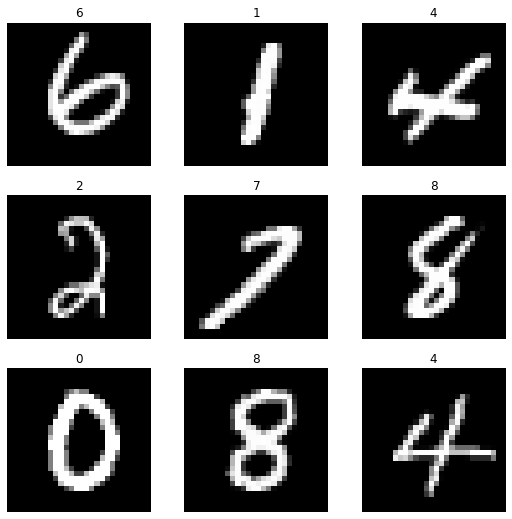

In [76]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, arch=resnet18, metrics=accuracy)

SuggestedLRs(lr_min=3.981071586167673e-07, lr_steep=6.309573450380412e-07)

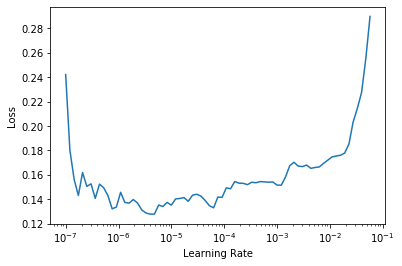

In [82]:
learn.lr_find()

In [81]:
learn.fine_tune(1, 1e-5)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/ashish.jha/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.209318,0.120146,0.964571,04:23


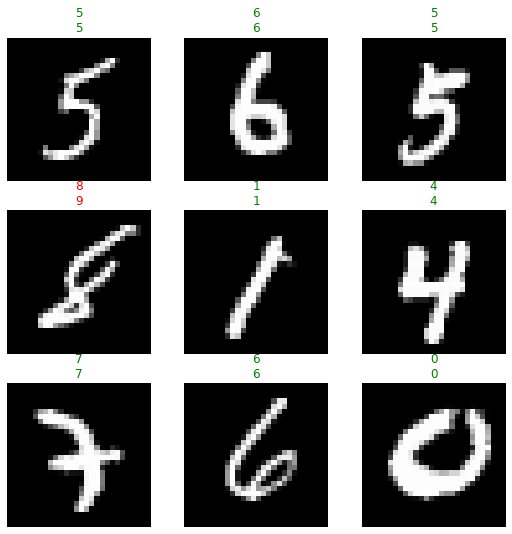

In [83]:
learn.show_results()

In [84]:
interp = Interpretation.from_learner(learn)

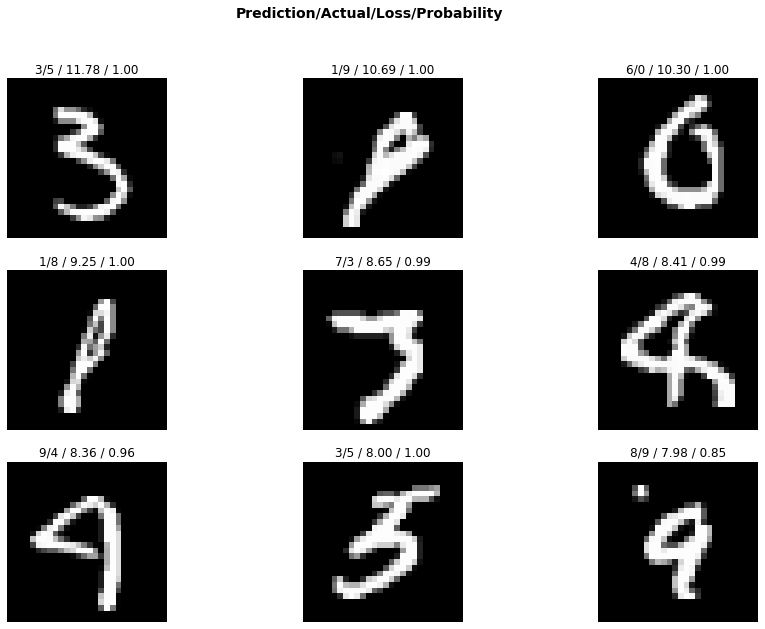

In [85]:
interp.plot_top_losses(9, figsize=(15,10))